# ขอบเขตงาน

งานที่ทำมาทั้งหมดโดยใช้โมเดล LSTM และ ARIMA ในการทำนาย Net Price of Bill:

การอ่านข้อมูล: เริ่มต้นด้วยการอ่านข้อมูลจากไฟล์ CSV และแปลงชื่อคอลัมน์เป็นภาษาอังกฤษ.

การเตรียมข้อมูล: แปลงคอลัมน์ 'Date' เป็นรูปแบบวันที่ และระบุช่วงวันที่ที่ต้องการ Train โมเดล LSTM.

การสร้างโมเดล LSTM: สร้างและฝึกโมเดล LSTM ด้วยชุดข้อมูล Train โดยใช้ Net Price of Bill ในการทำนายราคา Net Price ของวันถัดไป.

การทำนาย: ทำการทำนาย Net Price จากชุดการทดสอบโดยใช้โมเดล LSTM ที่สร้างขึ้น.

การคำนวณ MAPE: คำนวณ Mean Absolute Percentage Error (MAPE) เพื่อวัดความคลาดเคลื่อนของการทำนาย.

การพล็อตกราฟ: พล็อตกราฟ Predicted Value คู่กับข้อมูล Actual และแสดง MAPE ในกราฟ.

โมเดล LSTM (Long Short-Term Memory) เหมาะสำหรับงานที่มีลำดับเวลาหรือความเชื่อมโยงระหว่างข้อมูลตามลำดับเวลา เช่น งานทำนายและคาดการณ์ในอนาคตที่ความสัมพันธ์ระหว่างข้อมูลและเวลามีความสำคัญ หรืองานที่เกี่ยวข้องกับข้อมูลชุดเวลา (time series data) ซึ่งข้อมูลนี้มักมีลักษณะแนวโน้มและความสัมพันธ์ตามลำดับเวลา

# สาขาเซนทรัลอยุธยา


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
file_path = '/content/เซ็นทรัลอยุธยา.csv'
df = pd.read_csv(file_path)

# แปลงชื่อคอลัมน์เป็นภาษาอังกฤษ
df = df.rename(columns={
    'ลำดับ': 'Order',
    'วันที่': 'Date',
    'วัน': 'Day',
    'เวลา': 'Time',
    'เลขที่บิล': 'Bill Number',
    'ประเภทบิล': 'Bill Type',
    'เลขที่ใบเสร็จ/เลขที่ใบแจ้งหนี้': 'Invoice Number',
    'ประเภทการชำระเงิน': 'Payment Type',
    'ราคารวมก่อนส่วนลด': 'Total Price Before Discount',
    'ส่วนลดจากรายการที่ให้ฟรี': 'Discount from Free Items',
    'ราคาสุทธิ (ใบเสร็จ/ใบแจ้งหนี้)': 'Net Price (Invoice)',
    'ราคาสุทธิของบิล': 'Net Price of Bill',
    'สถานะ': 'Status',
    'ประจำวัน': 'Daily',
    'ประจำเดือน': 'Monthly',
    'ประจำวันหยุด': 'Holiday',
    'ยอดประจำชนิดวัน': 'Daily Type Total',
    'วันหวยออก': 'Lottery Draw Day',
    'วันเปิดเทอม 2023': 'Semester Opening',
    'วันปิดเทอม 2022': 'Semester Closing'
})

# แสดง DataFrame หลังจากแปลงชื่อคอลัมน์
df


,Order,Date,Day,Time,Bill Number,Bill Type,Invoice Number,Payment Type,Total Price Before Discount,Discount from Free Items,...,Net Price (Invoice),Net Price of Bill,Status,Daily,Monthly,Holiday,Daily Type Total,Lottery Draw Day,Semester Opening,Semester Closing
0,1,18/11/2022,Friday,11:50,B651118000002,ทานร้าน,RVPOS165111800001,QR Code,1996.0,0,...,2135.72,2135.72,เสร็จสิ้น,25725.56617,671723.1167,"THB 42,783.5",863644.0071,"฿25,587",22466.60563,43055.77308
1,2,18/11/2022,Friday,11:51,B651118000001,ทานร้าน,RVPOS165111800002,QR Code,1996.0,0,...,2135.72,2135.72,เสร็จสิ้น,25725.56617,671723.1167,NaN,863644.0071,"฿25,587",22466.60563,43055.77308
2,3,18/11/2022,Friday,12:05,B651118000003,ทานร้าน,RVPOS165111800003,เงินสด,598.0,0,...,639.86,639.86,เสร็จสิ้น,25725.56617,671723.1167,NaN,863644.0071,"฿25,587",22466.60563,43055.77308
3,4,18/11/2022,Friday,12:46,B651118000008,ทานร้าน,RVPOS165111800004,QR Code,598.0,0,...,639.86,639.86,เสร็จสิ้น,25725.56617,671723.1167,NaN,863644.0071,"฿25,587",22466.60563,43055.77308
4,5,18/11/2022,Friday,12:51,B651118000004,ทานร้าน,RVPOS165111800005,เงินสด,1196.0,0,...,1151.75,1151.75,เสร็จสิ้น,25725.56617,671723.1167,NaN,863644.0071,"฿25,587",22466.60563,43055.77308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5810,5811,10/7/2023,Monday,17:16,B660710000009,ทานร้าน,RVPOS166071000009,บัตรเครดิต/เดบิต,559.0,0,...,559.00,559.00,เสร็จสิ้น,25725.56617,671723.1167,42783.54338,863644.0071,"฿25,587",22466.60563,43055.77308
5811,5812,10/7/2023,Monday,18:28,B660710000011,ทานร้าน,RVPOS166071000010,QR Code,718.0,0,...,718.00,718.00,เสร็จสิ้น,25725.56617,671723.1167,42783.54338,863644.0071,"฿25,587",22466.60563,43055.77308
5812,5813,10/7/2023,Monday,18:47,B660710000010,ทานร้าน,RVPOS166071000011,บัตรเครดิต/เดบิต,1677.0,0,...,1677.00,1677.00,เสร็จสิ้น,25725.56617,671723.1167,42783.54338,863644.0071,"฿25,587",22466.60563,43055.77308
5813,5814,10/7/2023,Monday,20:25,B660710000012,ทานร้าน,RVPOS166071000012,QR Code,718.0,0,...,718.00,718.00,เสร็จสิ้น,25725.56617,671723.1167,42783.54338,863644.0071,"฿25,587",22466.60563,43055.77308


In [ ]:
payment_type_counts = df['Payment Type'].value_counts()
print(payment_type_counts)

QR Code             2917
เงินสด              1838
บัตรเครดิต/เดบิต     979
เงินเชื่อ             50
QR Code, เงินสด       18
เงินสด, QR Code       13
Name: Payment Type, dtype: int64


In [ ]:
# แก้ไขข้อมูลในคอลัมน์ "ประเภทการชำระเงิน"
df['Payment Type'] = df['Payment Type'].replace({
    'เงินสด': 'Cash',
    'บัตรเครดิต/เดบิต': 'Credit/debit',
    'เงินเชื่อ': 'Credit',
    'QR Code, เงินสด': 'QR Code, Cash',
    'เงินสด, QR Code': 'Cash, QR Code'
})


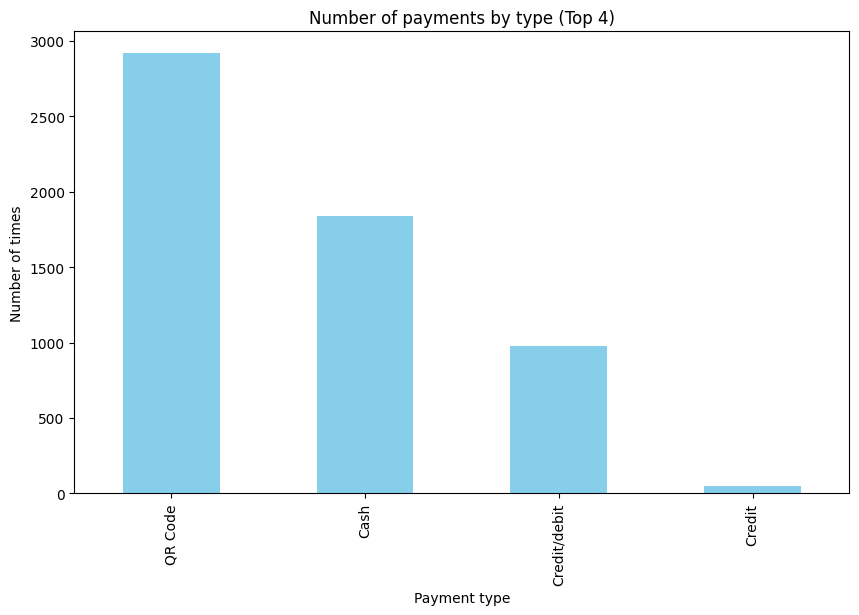

In [ ]:
# นับจำนวนการชำระเงินตามประเภท
payment_type_counts = df['Payment Type'].value_counts()


payment_types = payment_type_counts.head(4)

# สร้างกราฟแท่งเรียงลำดับ
plt.figure(figsize=(10, 6))
payment_types.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Number of payments by type (Top 4)')
plt.xlabel('Payment type')
plt.ylabel('Number of times')
plt.show()


In [ ]:
# แปลงคอลัมน์ "date" เป็นประจำเดือน
df['Date'] = pd.to_datetime(df['Date']).dt.to_period('M')

<ipython-input-5-c52f68c0f4df>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date']).dt.to_period('M')


In [ ]:

# เช็คข้อมูลในคอลัมน์ "Net price of the bill"
net_price_column = df['Net Price of Bill']
print(net_price_column)

0       2135.72
1       2135.72
2        639.86
3        639.86
4       1151.75
         ...   
5810     559.00
5811     718.00
5812    1677.00
5813     718.00
5814     718.00
Name: Net Price of Bill, Length: 5815, dtype: float64


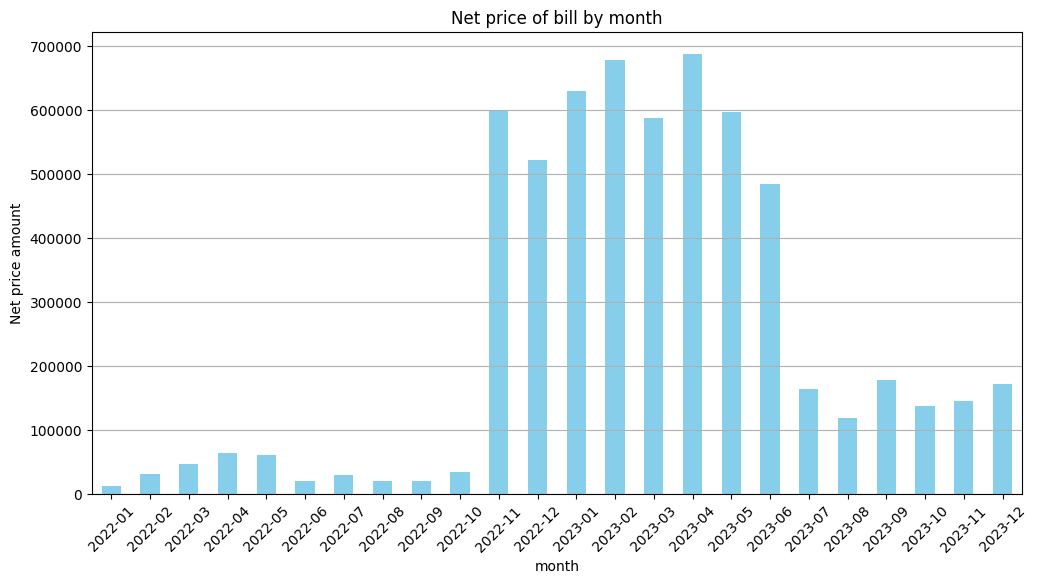

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# กลุ่มข้อมูลตามเดือนและคำนวณราคาสุทธิของบิลรวมในแต่ละเดือน
monthly_data = df.groupby('Date')['Net Price of Bill'].sum()

# สร้างกราฟแผนภูมิแท่งเพื่อแสดงข้อมูลเปรียบเทียบตามเดือน
plt.figure(figsize=(12, 6))
monthly_data.plot(kind='bar', color='skyblue')
plt.title('Net price of bill by month')
plt.xlabel('month')
plt.ylabel('Net price amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

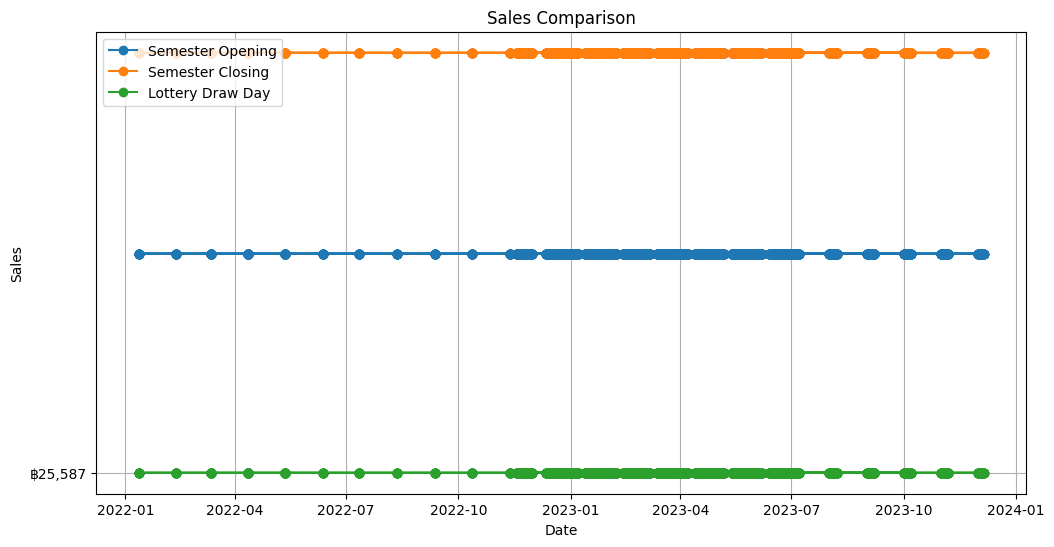

In [ ]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot 'Semester Opening', 'Semester Closing', and 'Lottery Draw Day' with line and markers
plt.plot(df['Date'], df['Semester Opening'], label='Semester Opening', linestyle='-', marker='o')
plt.plot(df['Date'], df['Semester Closing'], label='Semester Closing', linestyle='-', marker='o')
plt.plot(df['Date'], df['Lottery Draw Day'], label='Lottery Draw Day', linestyle='-', marker='o')

# Customize the plot
plt.title('Sales Comparison')
plt.xlabel('Date')
plt.ylabel('Sales')

# Add legend
plt.legend()

# Display grid lines
plt.grid(True)

# Show the plot
plt.show()


# ทำการ Prediction ยอดขายรายวันสาขาเซนทรัลอยุธยา

Epoch 1/15
63/63 [==============================] - 6s 56ms/step - loss: 0.0143
Epoch 2/15
63/63 [==============================] - 2s 35ms/step - loss: 0.0085
Epoch 3/15
63/63 [==============================] - 3s 40ms/step - loss: 0.0085
Epoch 4/15
63/63 [==============================] - 2s 37ms/step - loss: 0.0085
Epoch 5/15
63/63 [==============================] - 2s 28ms/step - loss: 0.0085
Epoch 6/15
63/63 [==============================] - 2s 27ms/step - loss: 0.0085
Epoch 7/15
63/63 [==============================] - 2s 37ms/step - loss: 0.0084
Epoch 8/15
63/63 [==============================] - 2s 35ms/step - loss: 0.0085
Epoch 9/15
63/63 [==============================] - 2s 28ms/step - loss: 0.0084
Epoch 10/15
63/63 [==============================] - 2s 28ms/step - loss: 0.0084
Epoch 11/15
63/63 [==============================] - 2s 28ms/step - loss: 0.0084
Epoch 12/15
63/63 [==============================] - 2s 27ms/step - loss: 0.0084
Epoch 13/15
63/63 [==================

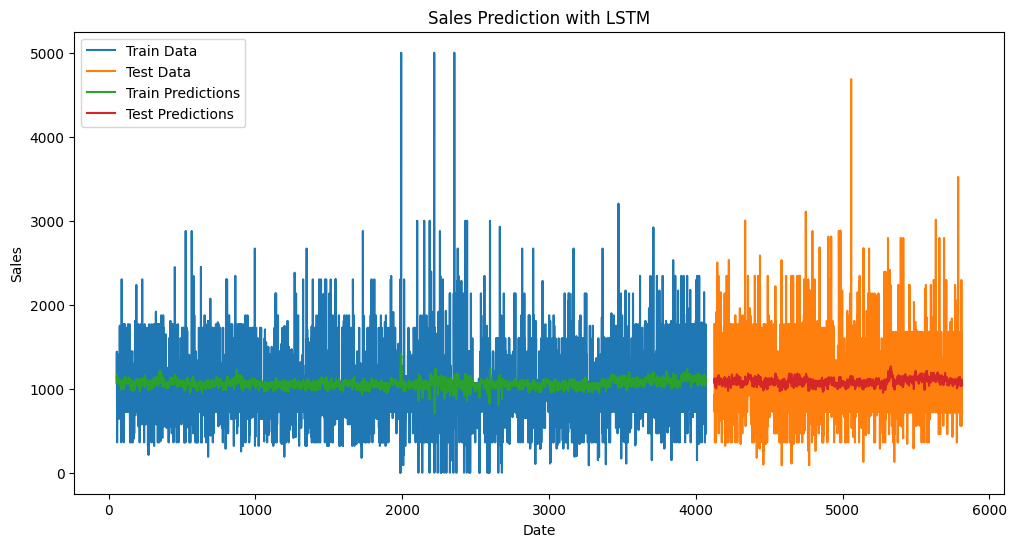

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load and preprocess the data (assuming you've already loaded the data into 'df')
# ...

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Select features and target variable
features = df[['Net Price of Bill', 'ส่วนลดรวมจากโปรโมชั่น', 'Daily Type Total', 'Discount from Free Items','Total Price Before Discount','Daily Type Total', 'Semester Opening', 'Semester Closing']]
target = df['Net Price of Bill']

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_features) * 0.7)
train_features, test_features = scaled_features[:train_size], scaled_features[train_size:]
train_target, test_target = scaled_target[:train_size], scaled_target[train_size:]

# Create sequences of data for LSTM training
def create_sequences(features, target, seq_length):
    X, y = [], []
    for i in range(len(features) - seq_length):
        X.append(features[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 55
X_train, y_train = create_sequences(train_features, train_target, seq_length)
X_test, y_test = create_sequences(test_features, test_target, seq_length)

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=15, batch_size=64)


# Make predictions using the trained model
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions to the original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index[seq_length:train_size], df['Net Price of Bill'][seq_length:train_size], label='Train Data')
plt.plot(df.index[train_size+seq_length:], df['Net Price of Bill'][train_size+seq_length:], label='Test Data')
plt.plot(df.index[seq_length:train_size], train_predictions, label='Train Predictions')
plt.plot(df.index[train_size+seq_length:], test_predictions, label='Test Predictions')
plt.legend()
plt.title('Sales Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


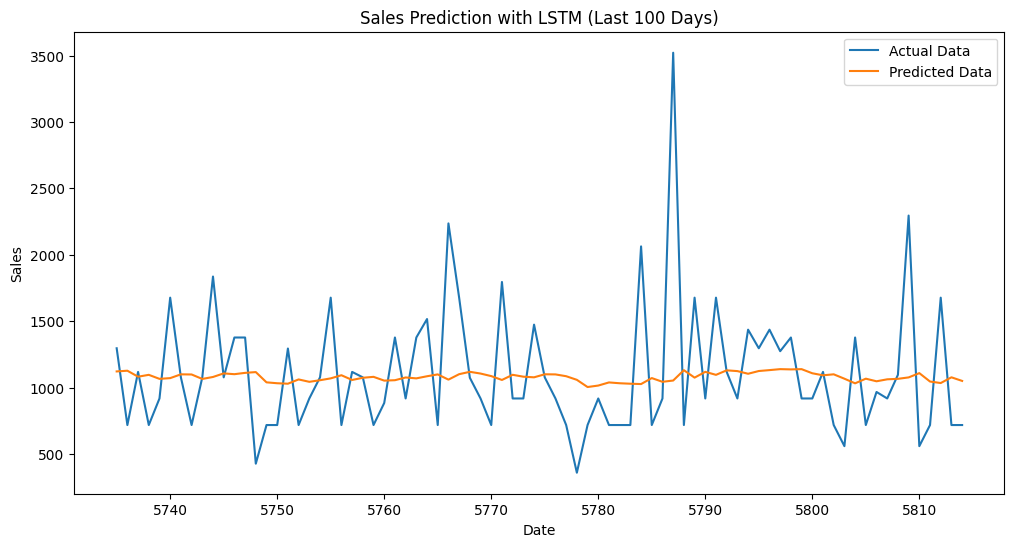

Test MAPE (Last 100 Days): 34.30%
Predicted Value for the Next Day: 1050.21


In [ ]:
def calculate_mape(actual, predicted):
    errors = np.abs(actual - predicted)
    percentage_errors = (errors / actual) * 100
    mape = np.mean(percentage_errors)
    return mape


# Calculate MAPE for the last 100 days
last_100_days_data = df[-80:]
test_predictions_last_100_days = test_predictions[-80:]

# Convert the data to Series
actual_data_series = last_100_days_data['Net Price of Bill'].reset_index(drop=True)
predicted_data_series = pd.Series(test_predictions_last_100_days.flatten())

# Get the last predicted value (value for the next day)
next_day_predicted_value = predicted_data_series.iloc[-1]

test_mape_last_100_days = calculate_mape(actual_data_series, predicted_data_series)

# Plot the actual and predicted values for the last 100 days
plt.figure(figsize=(12, 6))
plt.plot(last_100_days_data.index, last_100_days_data['Net Price of Bill'], label='Actual Data')
plt.plot(last_100_days_data.index, test_predictions_last_100_days, label='Predicted Data')
plt.legend()
plt.title('Sales Prediction with LSTM (Last 100 Days)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

print(f'Test MAPE (Last 100 Days): {test_mape_last_100_days:.2f}%')
# Print the last predicted value
print(f'Predicted Value for the Next Day: {next_day_predicted_value:.2f}')

# ทำการ Prediction ยอดขายในเดือนถัดไปของสาขาเซ็นทรัลอยุธยา

<ipython-input-8-7a122e4a0089>:34: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


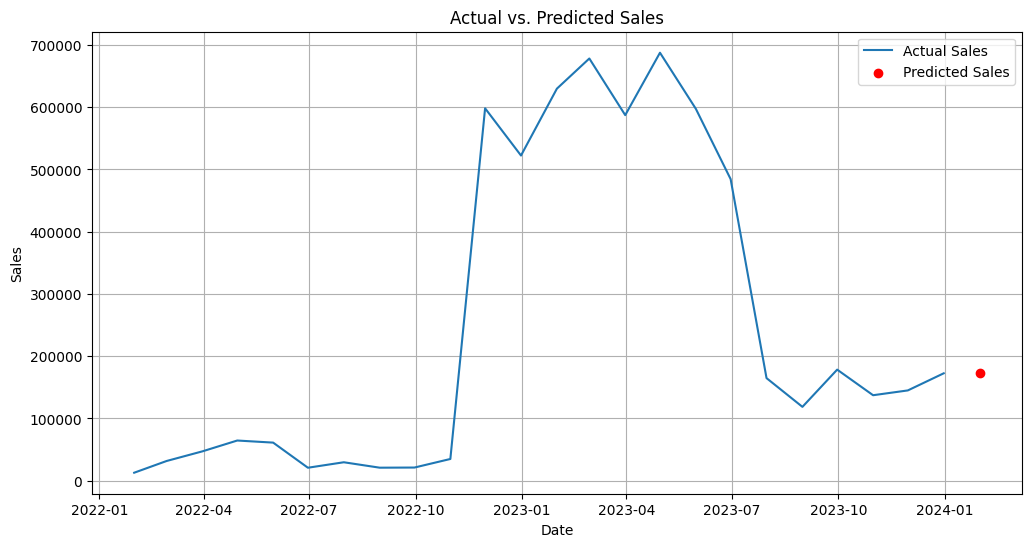


ยอดขายที่ทำนายในเดือนต่อไป: 2024-01-31    173030.941818
Freq: M, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# อ่านไฟล์ CSV
file_path = '/content/เซ็นทรัลอยุธยา.csv'
df = pd.read_csv(file_path)

# แปลงชื่อคอลัมน์เป็นภาษาอังกฤษ
df = df.rename(columns={
    'ลำดับ': 'Order',
    'วันที่': 'Date',
    'วัน': 'Day',
    'เวลา': 'Time',
    'เลขที่บิล': 'Bill Number',
    'ประเภทบิล': 'Bill Type',
    'เลขที่ใบเสร็จ/เลขที่ใบแจ้งหนี้': 'Invoice Number',
    'ประเภทการชำระเงิน': 'Payment Type',
    'ราคารวมก่อนส่วนลด': 'Total Price Before Discount',
    'ส่วนลดจากรายการที่ให้ฟรี': 'Discount from Free Items',
    'ราคาสุทธิ (ใบเสร็จ/ใบแจ้งหนี้)': 'Net Price (Invoice)',
    'ราคาสุทธิของบิล': 'Net Price of Bill',
    'สถานะ': 'Status',
    'ประจำวัน': 'Daily',
    'ประจำเดือน': 'Monthly',
    'ประจำวันหยุด': 'Holiday',
    'ยอดประจำชนิดวัน': 'Daily Type Total',
    'วันหวยออก': 'Lottery Draw Day',
    'ช่วงเปิดเทอม': 'Semester Opening',
    'ช่วงปิดเทอม': 'Semester Closing'
})

# แปลงคอลัมน์ "วันที่" เป็นรูปแบบวันที่
df['Date'] = pd.to_datetime(df['Date'])

# กำหนดค่า p, d, และ q ให้เหมาะสม (ต้องปรับแต่งตามข้อมูล)
p, d, q = 1, 1, 1

# ทำการจับคู่ข้อมูล (Differencing) ถ้าจำเป็น
# df['Net Price of Bill'] = df['Net Price of Bill'].diff(d).dropna()

# กลุ่มข้อมูลตามเดือนและคำนวณยอดขายรวมในแต่ละเดือน
monthly_data = df.groupby(pd.Grouper(key='Date', freq='M'))['Net Price of Bill'].sum()

# สร้างแบบจำลอง ARIMA
model = ARIMA(monthly_data, order=(p, d, q))

# ฝึกโมเดล ARIMA
model_fit = model.fit()

# ทำนายยอดขายในเดือนต่อไป
next_month_forecast = model_fit.forecast(steps=1)

# สร้างกราฟเพื่อแสดงการทำนายและข้อมูลจริง
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Actual Sales')
plt.scatter(monthly_data.index[-1] + pd.DateOffset(months=1), next_month_forecast, color='red', label='Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


print()
print("ยอดขายที่ทำนายในเดือนต่อไป:",  next_month_forecast)


คำนวณค่า Mean Absolute Error (MAE) และ Root Mean Square Error (RMSE) เพื่อวัดความคลาดเคลื่อนของการทำนาย:

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# คำนวณ MAE และ RMSE
actual_values = monthly_data[-1:]
mae = mean_absolute_error(actual_values, next_month_forecast)
rmse = np.sqrt(mean_squared_error(actual_values, next_month_forecast))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)


Mean Absolute Error (MAE): 322.2859309374762
Root Mean Square Error (RMSE): 322.2859309374762


# เมโทร-คลองรั้ง

In [ ]:
import pandas as pd

# อ่านไฟล์ CSV
file_path = '/content/เมโทร-คลองรั้ง.csv'
df2 = pd.read_csv(file_path)

# แปลงชื่อคอลัมน์เป็นภาษาอังกฤษ
df2 = df2.rename(columns={
    'ลำดับ': 'Order',
    'วันที่': 'Date',
    'วัน': 'Day',
    'เวลา': 'Time',
    'เลขที่บิล': 'Bill Number',
    'ประเภทบิล': 'Bill Type',
    'เลขที่ใบเสร็จ/เลขที่ใบแจ้งหนี้': 'Invoice Number',
    'ประเภทการชำระเงิน': 'Payment Type',
    'ราคารวมก่อนส่วนลด': 'Total Price Before Discount',
    'ส่วนลดจากรายการที่ให้ฟรี': 'Discount from Free Items',
    'ราคาสุทธิ (ใบเสร็จ/ใบแจ้งหนี้)': 'Net Price (Invoice)',
    'ราคาสุทธิของบิล': 'Net Price of Bill',
    'สถานะ': 'Status',
    'ประจำวัน': 'Daily',
    'ประจำเดือน': 'Monthly',
    'ประจำวันหยุด': 'Holiday',
    'ยอดประจำชนิดวัน': 'Daily Type Total',
    'วันหวยออก': 'Lottery Draw Day',
    'ช่วงเปิดเทอม': 'Semester Opening',
    'ช่วงปิดเทอม': 'Semester Closing'
})

# แสดง DataFrame หลังจากเปลี่ยนชื่อคอลัมน์
df2

,Order,Date,Day,Time,Bill Number,Bill Type,Invoice Number,Payment Type,Total Price Before Discount,Discount from Free Items,...,Net Price (Invoice),Net Price of Bill,Status,Daily,Monthly,Holiday,Daily Type Total,Lottery Draw Day,Semester Opening,Semester Closing
0,1,16/11/2022,Wednesday,13:08,B651116000001,ทานร้าน,RVPOS165111600001,เงินสด,798,0,...,798.0,798.0,เสร็จสิ้น,33266.65439,876021.8989,"THB 39,179.39","THB 1,126,313.9",34026.7,34834.2093,33250.19565
1,2,16/11/2022,Wednesday,13:22,B651116000002,ทานร้าน,RVPOS165111600002,QR Code,798,0,...,798.0,798.0,เสร็จสิ้น,33266.65439,876021.8989,"THB 39,179.39","THB 1,126,313.9",34026.7,34834.2093,33250.19565
2,3,16/11/2022,Wednesday,13:45,B651116000003,ทานร้าน,RVPOS165111600003,เงินสด,897,0,...,897.0,897.0,เสร็จสิ้น,33266.65439,876021.8989,"THB 39,179.39","THB 1,126,313.9",34026.7,34834.2093,33250.19565
3,4,16/11/2022,Wednesday,13:45,B651116000004,ทานร้าน,RVPOS165111600004,เงินสด,598,0,...,598.0,598.0,เสร็จสิ้น,33266.65439,876021.8989,"THB 39,179.39","THB 1,126,313.9",34026.7,34834.2093,33250.19565
4,5,16/11/2022,Wednesday,13:56,B651116000005,ทานร้าน,RVPOS165111600005,QR Code,1685,0,...,1685.0,1685.0,เสร็จสิ้น,33266.65439,876021.8989,"THB 39,179.39","THB 1,126,313.9",34026.7,34834.2093,33250.19565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9827,9828,10/7/2023,Monday,20:07,B660710000031,ทานร้าน,RVPOS166071000026,QR Code,598,0,...,598.0,598.0,เสร็จสิ้น,33266.65439,876021.8989,"THB 39,179.39","THB 1,126,313.9",34026.7,34834.2093,33250.19565
9828,9829,10/7/2023,Monday,20:25,B660710000032,ทานร้าน,RVPOS166071000027,QR Code,1497,0,...,1497.0,1497.0,เสร็จสิ้น,33266.65439,876021.8989,"THB 39,179.39","THB 1,126,313.9",34026.7,34834.2093,33250.19565
9829,9830,10/7/2023,Monday,20:26,B660710000029,ทานร้าน,RVPOS166071000028,QR Code,798,0,...,798.0,798.0,เสร็จสิ้น,33266.65439,876021.8989,"THB 39,179.39","THB 1,126,313.9",34026.7,34834.2093,33250.19565
9830,9831,10/7/2023,Monday,20:29,B660710000030,ทานร้าน,RVPOS166071000029,เงินสด,1497,0,...,1497.0,1497.0,เสร็จสิ้น,33266.65439,876021.8989,"THB 39,179.39","THB 1,126,313.9",34026.7,34834.2093,33250.19565


In [ ]:
Bill = df['Bill Type'].value_counts()
print(Bill)

ทานร้าน     5802
Delivery      13
Name: Bill Type, dtype: int64


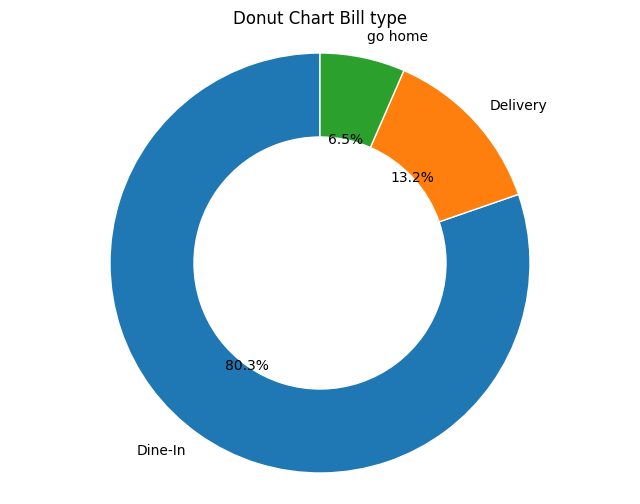

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# สร้าง DataFrame ข้อมูลตัวอย่าง
data = {'Bill Type': ['ทานร้าน', 'Delivery', 'กลับบ้าน'],
        'Count': [7895, 1294, 643]}

df = pd.DataFrame(data)

# แปลงค่าในคอลัมน์ "Bill Type" จากภาษาอังกฤษเป็นภาษาไทย
df['Bill Type'] = df['Bill Type'].replace({'ทานร้าน': 'Dine-In', 'Delivery': 'Delivery', 'กลับบ้าน': 'go home'})

# สร้าง Donut Chart
plt.figure(figsize=(8, 6))

# สร้างวงกลมภายนอก (วงนอก) สีขาว
plt.pie([1], colors=['white'], radius=0.7)

# สร้าง Donut Chart ภายใน (วงใน) ด้วยข้อมูลจริง
plt.pie(df['Count'], labels=df['Bill Type'], autopct='%1.1f%%', startangle=90,
        wedgeprops=dict(width=0.4, edgecolor='w'))

# เพิ่มชื่อกราฟ
plt.title('Donut Chart Bill type')

# ทำให้กราฟเป็นวงกลม
plt.axis('equal')
plt.show()


<ipython-input-173-0b07025d1017>:33: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2['Date'] = pd.to_datetime(df2['Date'])


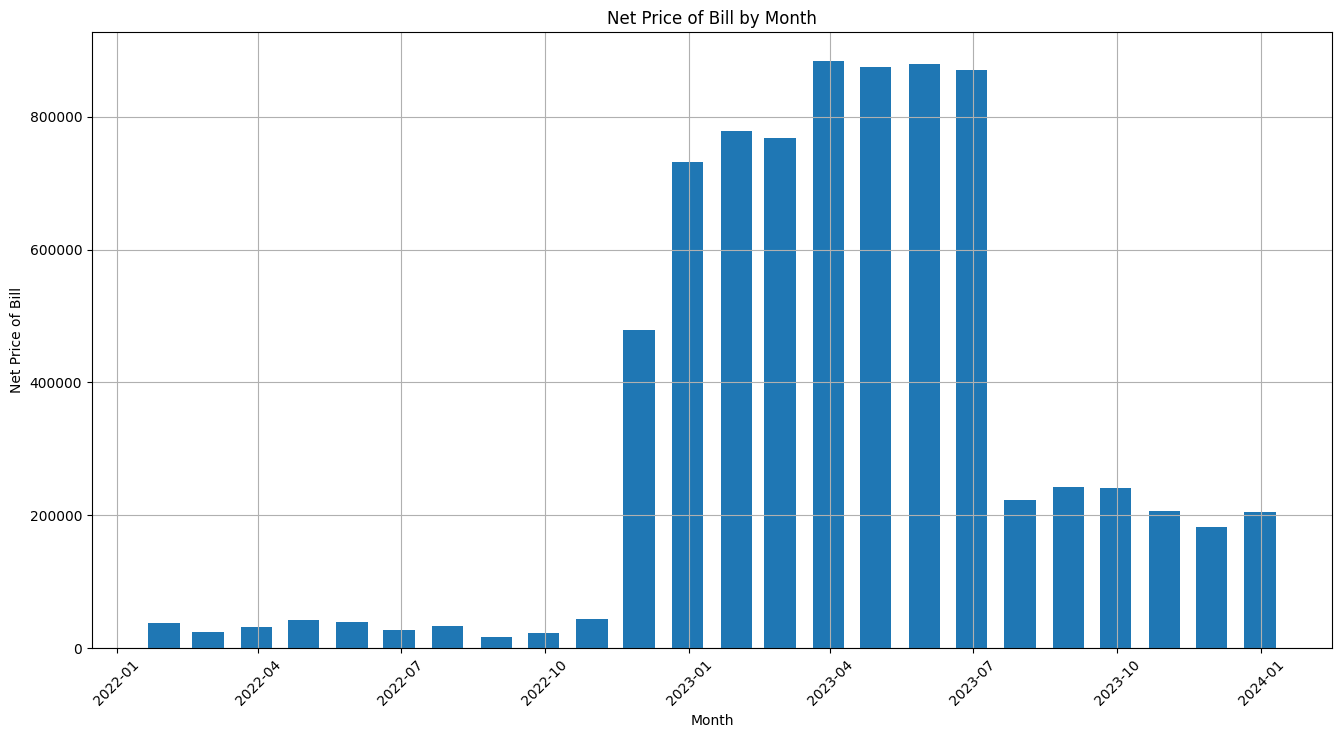

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
file_path = '/content/เมโทร-คลองรั้ง.csv'
df2 = pd.read_csv(file_path)

# แปลงชื่อคอลัมน์เป็นภาษาอังกฤษ
df2 = df2.rename(columns={
    'ลำดับ': 'Order',
    'วันที่': 'Date',
    'วัน': 'Day',
    'เวลา': 'Time',
    'เลขที่บิล': 'Bill Number',
    'ประเภทบิล': 'Bill Type',
    'เลขที่ใบเสร็จ/เลขที่ใบแจ้งหนี้': 'Invoice Number',
    'ประเภทการชำระเงิน': 'Payment Type',
    'ราคารวมก่อนส่วนลด': 'Total Price Before Discount',
    'ส่วนลดจากรายการที่ให้ฟรี': 'Discount from Free Items',
    'ราคาสุทธิ (ใบเสร็จ/ใบแจ้งหนี้)': 'Net Price (Invoice)',
    'ราคาสุทธิของบิล': 'Net Price of Bill',
    'สถานะ': 'Status',
    'ประจำวัน': 'Daily',
    'ประจำเดือน': 'Monthly',
    'ประจำวันหยุด': 'Holiday',
    'ยอดประจำชนิดวัน': 'Daily Type Total',
    'วันหวยออก': 'Lottery Draw Day',
    'ช่วงเปิดเทอม': 'Semester Opening',
    'ช่วงปิดเทอม': 'Semester Closing'
})

# แปลงคอลัมน์ "วันที่" เป็นรูปแบบวันที่
df2['Date'] = pd.to_datetime(df2['Date'])

# กลุ่มข้อมูลตามเดือนและคำนวณยอดขายรวมในแต่ละเดือน
monthly_data = df2.groupby(pd.Grouper(key='Date', freq='M'))['Net Price of Bill'].sum()

# สร้างกราฟแผนภูมิแท่งสำหรับแต่ละเดือน
plt.figure(figsize=(16, 8))  # ปรับขนาดกราฟ
plt.bar(monthly_data.index, monthly_data.values, width=20)  # ปรับขนาดของแท่งด้วย width
plt.title('Net Price of Bill by Month')
plt.xlabel('Month')
plt.ylabel('Net Price of Bill')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

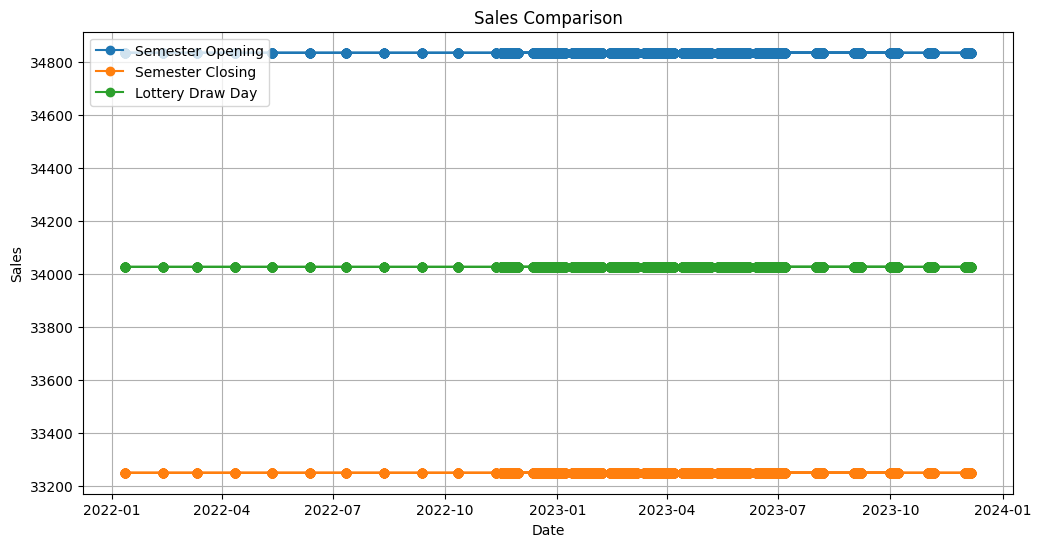

In [ ]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot 'Semester Opening', 'Semester Closing', and 'Lottery Draw Day' with line and markers
plt.plot(df2['Date'], df2['Semester Opening'], label='Semester Opening', linestyle='-', marker='o')
plt.plot(df2['Date'], df2['Semester Closing'], label='Semester Closing', linestyle='-', marker='o')
plt.plot(df2['Date'], df2['Lottery Draw Day'], label='Lottery Draw Day', linestyle='-', marker='o')

# Customize the plot
plt.title('Sales Comparison')
plt.xlabel('Date')
plt.ylabel('Sales')

# Add legend
plt.legend()

# Display grid lines
plt.grid(True)

# Show the plot
plt.show()


# ทำการ Prediction ยอดขายรายวันสาขาเมโทร-คลองรั้ง

Epoch 1/20
246/246 [==============================] - 5s 11ms/step - loss: 0.0060
Epoch 2/20
246/246 [==============================] - 2s 10ms/step - loss: 0.0052
Epoch 3/20
246/246 [==============================] - 2s 7ms/step - loss: 0.0052
Epoch 4/20
246/246 [==============================] - 2s 7ms/step - loss: 0.0052
Epoch 5/20
246/246 [==============================] - 2s 7ms/step - loss: 0.0052
Epoch 6/20
246/246 [==============================] - 2s 7ms/step - loss: 0.0051
Epoch 7/20
246/246 [==============================] - 2s 10ms/step - loss: 0.0051
Epoch 8/20
246/246 [==============================] - 2s 8ms/step - loss: 0.0051
Epoch 9/20
246/246 [==============================] - 2s 9ms/step - loss: 0.0051
Epoch 10/20
246/246 [==============================] - 2s 7ms/step - loss: 0.0051
Epoch 11/20
246/246 [==============================] - 2s 7ms/step - loss: 0.0051
Epoch 12/20
246/246 [==============================] - 2s 7ms/step - loss: 0.0051
Epoch 13/20
246/246 [=

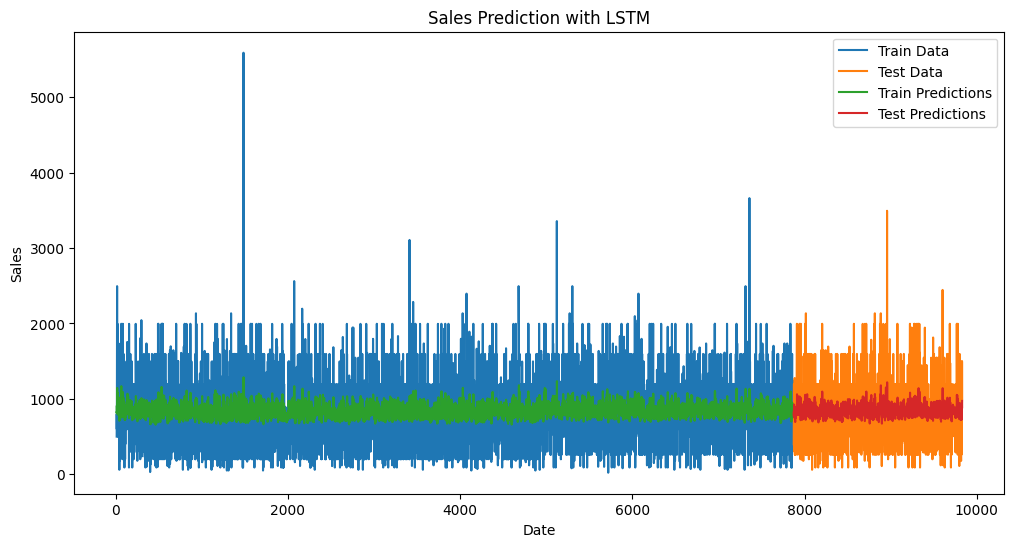

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load and preprocess the data (assuming you've already loaded the data into 'df')
# ...

# Convert the 'Date' column to datetime
df2['Date'] = pd.to_datetime(df2['Date'], format='%d/%m/%Y')

# Select features and target variable
features = df2[['Net Price of Bill', 'Semester Opening', 'Semester Closing']]
target = df2['Net Price of Bill']

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_features) * 0.8)
train_features, test_features = scaled_features[:train_size], scaled_features[train_size:]
train_target, test_target = scaled_target[:train_size], scaled_target[train_size:]

# Create sequences of data for LSTM training
def create_sequences(features, target, seq_length):
    X, y = [], []
    for i in range(len(features) - seq_length):
        X.append(features[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X_train, y_train = create_sequences(train_features, train_target, seq_length)
X_test, y_test = create_sequences(test_features, test_target, seq_length)

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Make predictions using the trained model
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions to the original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(df2.index[seq_length:train_size], df2['Net Price of Bill'][seq_length:train_size], label='Train Data')
plt.plot(df2.index[train_size+seq_length:], df2['Net Price of Bill'][train_size+seq_length:], label='Test Data')
plt.plot(df2.index[seq_length:train_size], train_predictions, label='Train Predictions')
plt.plot(df2.index[train_size+seq_length:], test_predictions, label='Test Predictions')
plt.legend()
plt.title('Sales Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


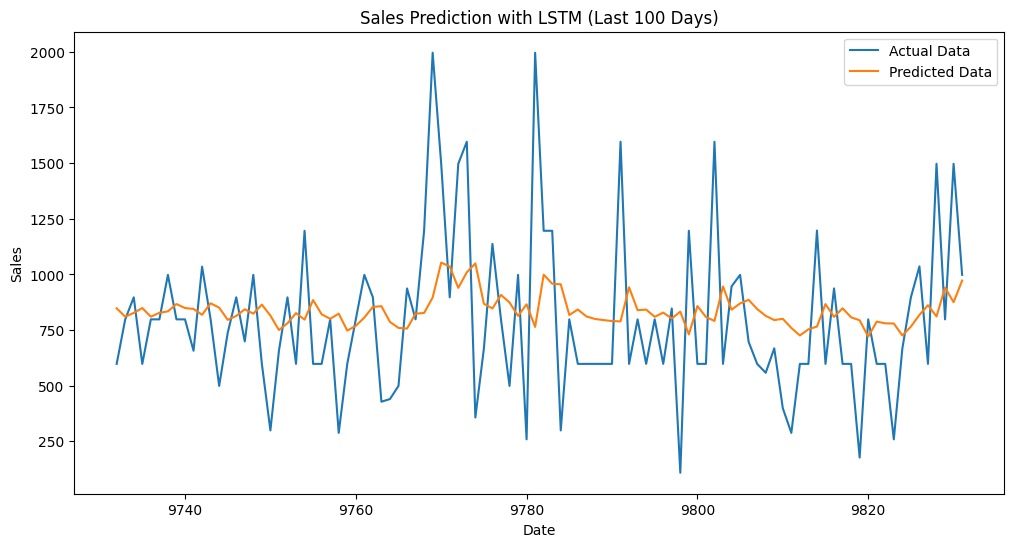

Test MAPE (Last 100 Days): 50.47%
Predicted Value for the Next Day: 972.31


In [ ]:
# Calculate MAPE for the last 100 days
last_100_days_data = df2[-100:]
test_predictions_last_100_days = test_predictions[-100:]

# Convert the data to Series
actual_data_series = last_100_days_data['Net Price of Bill'].reset_index(drop=True)
predicted_data_series = pd.Series(test_predictions_last_100_days.flatten())

# Get the last predicted value (value for the next day)
next_day_predicted_value2 = predicted_data_series.iloc[-1]

test_mape_last_100_days = calculate_mape(actual_data_series, predicted_data_series)

# Plot the actual and predicted values for the last 100 days
plt.figure(figsize=(12, 6))
plt.plot(last_100_days_data.index, last_100_days_data['Net Price of Bill'], label='Actual Data')
plt.plot(last_100_days_data.index, test_predictions_last_100_days, label='Predicted Data')
plt.legend()
plt.title('Sales Prediction with LSTM (Last 100 Days)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

print(f'Test MAPE (Last 100 Days): {test_mape_last_100_days:.2f}%')
# Print the last predicted value
print(f'Predicted Value for the Next Day: {next_day_predicted_value2:.2f}')

# ทำการ Prediction ยอดขายในเดือนถัดไปของสาขาเมโทร-คลองรั้ง

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


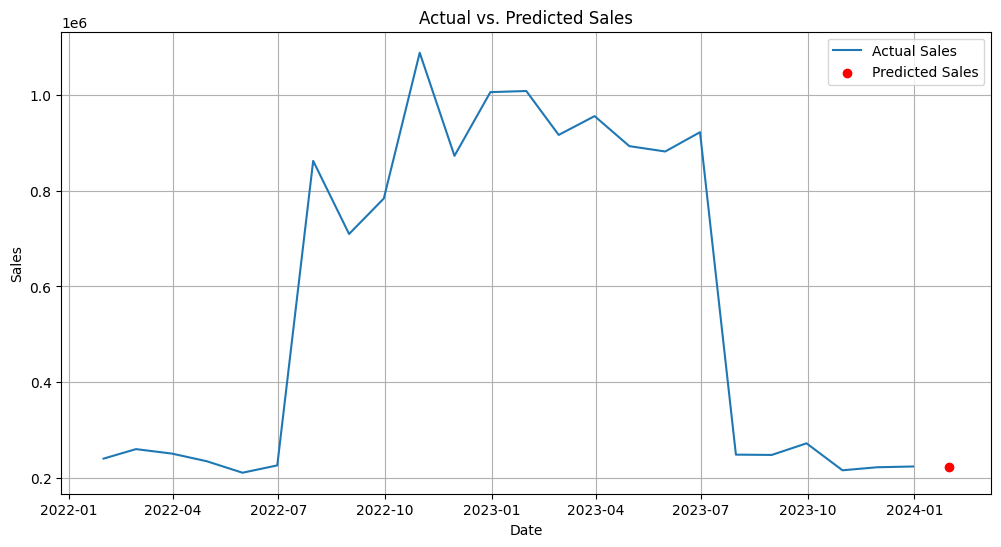

ยอดขายที่ทำนายในเดือนต่อไป: 2024-01-31    223845.714069
Freq: M, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# กำหนดค่า p, d, และ q ให้เหมาะสม (ต้องปรับแต่งตามข้อมูล)
p, d, q = 1, 1, 1

# สร้างแบบจำลอง ARIMA
model = ARIMA(monthly_data, order=(p, d, q))

# ฝึกโมเดล ARIMA
model_fit = model.fit()

# ทำนายยอดขายในเดือนต่อไป
next_month_forecast = model_fit.forecast(steps=1)

# สร้างกราฟเพื่อแสดงการทำนายและข้อมูลจริง
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Actual Sales')
plt.scatter(monthly_data.index[-1] + pd.DateOffset(months=1), next_month_forecast, color='red', label='Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

print("ยอดขายที่ทำนายในเดือนต่อไป:",  next_month_forecast)

คำนวณค่า Mean Absolute Error (MAE) และ Root Mean Square Error (RMSE) เพื่อวัดความคลาดเคลื่อนของการทำนาย:

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# คำนวณ MAE และ RMSE
actual_values = monthly_data[-1:]
mae = mean_absolute_error(actual_values, next_month_forecast)
rmse = np.sqrt(mean_squared_error(actual_values, next_month_forecast))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)


Mean Absolute Error (MAE): 322.2859309374762
Root Mean Square Error (RMSE): 322.2859309374762


# 304 (กบินทร์บุรี)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
file_path = '/content/304 (กบินทร์บุรี).csv'
df3 = pd.read_csv(file_path)
df3

,ลำดับ,วันที่,วัน,เวลา,เลขที่บิล,ประเภทบิล,เลขที่ใบเสร็จ/เลขที่ใบแจ้งหนี้,ประเภทการชำระเงิน,ราคารวมก่อนส่วนลด,ส่วนลดจากรายการที่ให้ฟรี,...,ราคาสุทธิ (ใบเสร็จ/ใบแจ้งหนี้),ราคาสุทธิของบิล,สถานะ,ประจำวัน,ประจำเดือน,ประจำวันหยุด,ยอดประจำชนิดวัน,วันหวยออก,วันเปิดเทอม 2022,วันปิดเทอม 2022
0,1.0,1/07/2022,Friday,11:36,B650701113602,กลับบ้าน,RVPOS165070100001,เงินสด,499,0,...,499.0,499.0,เสร็จสิ้น,36982.25164,"THB 1,146,449.80","THB 45,379.42","THB 1,965,342.5","THB 37,995.62",36679.42958,"THB 41,821.0"
1,2.0,1/07/2022,Friday,12:05,B650701112220,ทานร้าน,RVPOS165070100002,เงินสด,998,0,...,998.0,998.0,เสร็จสิ้น,36982.25164,"THB 1,146,449.80","THB 45,379.42","THB 1,965,342.5","THB 37,995.62",36679.42958,"THB 41,821.0"
2,3.0,1/07/2022,Friday,12:05,B650701111115,ทานร้าน,RVPOS165070100003,เงินสด,798,0,...,798.0,798.0,เสร็จสิ้น,36982.25164,"THB 1,146,449.80","THB 45,379.42","THB 1,965,342.5","THB 37,995.62",36679.42958,"THB 41,821.0"
3,4.0,1/07/2022,Friday,13:36,B650701114504,ทานร้าน,RVPOS165070100004,เงินสด,1196,0,...,1196.0,1196.0,เสร็จสิ้น,36982.25164,"THB 1,146,449.80","THB 45,379.42","THB 1,965,342.5","THB 37,995.62",36679.42958,"THB 41,821.0"
4,5.0,1/07/2022,Friday,13:56,B650701134947,ทานร้าน,RVPOS165070100005,QR Code,897,0,...,897.0,897.0,เสร็จสิ้น,36982.25164,"THB 1,146,449.80","THB 45,379.42","THB 1,965,342.5","THB 37,995.62",36679.42958,"THB 41,821.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18209,18205.0,10/07/2023,Monday,17:35,B660710000014,Delivery,RVPOS166071000013,"เงินสด, บัตรเครดิต/เดบิต",328,0,...,328.0,328.0,เสร็จสิ้น,36982.25164,NaN,"THB 45,379.42","THB 1,965,342.5","THB 37,995.62",36679.42958,"THB 41,821.0"
18210,18206.0,10/07/2023,Monday,17:51,B660710000019,Delivery,IVPOS166071000002,เงินเชื่อ,518,0,...,518.0,518.0,เสร็จสิ้น,36982.25164,NaN,"THB 45,379.42","THB 1,965,342.5","THB 37,995.62",36679.42958,"THB 41,821.0"
18211,18207.0,10/07/2023,Monday,18:29,B660710000016,ทานร้าน,RVPOS166071000014,เงินสด,798,0,...,798.0,798.0,เสร็จสิ้น,36982.25164,NaN,"THB 45,379.42","THB 1,965,342.5","THB 37,995.62",36679.42958,"THB 41,821.0"
18212,18208.0,10/07/2023,Monday,18:40,B660710000015,ทานร้าน,RVPOS166071000015,QR Code,798,0,...,798.0,798.0,เสร็จสิ้น,36982.25164,NaN,"THB 45,379.42","THB 1,965,342.5","THB 37,995.62",36679.42958,"THB 41,821.0"


In [ ]:
# สร้างคำสั่งสำหรับเปลี่ยนชื่อคอลัมน์
df3 = df3.rename(columns={
    'ลำดับ': 'Order',
    'วันที่': 'Date',
    'วัน': 'Day',
    'เวลา': 'Time',
    'เลขที่บิล': 'Bill Number',
    'ประเภทบิล': 'Bill Type',
    'เลขที่ใบเสร็จ/เลขที่ใบแจ้งหนี้': 'Invoice Number',
    'ประเภทการชำระเงิน': 'Payment Type',
    'ราคารวมก่อนส่วนลด': 'Total Price Before Discount',
    'ส่วนลดจากรายการที่ให้ฟรี': 'Discount from Free Items',
    'ราคาสุทธิ (ใบเสร็จ/ใบแจ้งหนี้)': 'Net Price (Invoice)',
    'ราคาสุทธิของบิล': 'Net Price of Bill',
    'สถานะ': 'Status',
    'ประจำวัน': 'Daily',
    'ประจำเดือน': 'Monthly',
    'ประจำวันหยุด': 'Holiday',
    'ยอดประจำชนิดวัน': 'Daily Type Total',
    ' วันหวยออก ': 'Lottery Draw Day',
    'วันเปิดเทอม 2022': 'Semester Opening',
    'วันปิดเทอม 2022': 'Semester Closing'
})

# Use the rename method to change column names


# แสดง DataFrame ใหม่ที่มีชื่อคอลัมน์ใหม่
df3

,Order,Date,Day,Time,Bill Number,Bill Type,Invoice Number,Payment Type,Total Price Before Discount,Discount from Free Items,...,Net Price (Invoice),Net Price of Bill,Status,Daily,Monthly,Holiday,Daily Type Total,Lottery Draw Day,Semester Opening,Semester Closing
0,1.0,2022-01-07,Friday,11:36,B650701113602,กลับบ้าน,RVPOS165070100001,เงินสด,499,0,...,499.0,499.0,เสร็จสิ้น,36982.25164,"THB 1,146,449.80","THB 45,379.42","THB 1,965,342.5","THB 37,995.62",36679.42958,"THB 41,821.0"
1,2.0,2022-01-07,Friday,12:05,B650701112220,ทานร้าน,RVPOS165070100002,เงินสด,998,0,...,998.0,998.0,เสร็จสิ้น,36982.25164,"THB 1,146,449.80","THB 45,379.42","THB 1,965,342.5","THB 37,995.62",36679.42958,"THB 41,821.0"
2,3.0,2022-01-07,Friday,12:05,B650701111115,ทานร้าน,RVPOS165070100003,เงินสด,798,0,...,798.0,798.0,เสร็จสิ้น,36982.25164,"THB 1,146,449.80","THB 45,379.42","THB 1,965,342.5","THB 37,995.62",36679.42958,"THB 41,821.0"
3,4.0,2022-01-07,Friday,13:36,B650701114504,ทานร้าน,RVPOS165070100004,เงินสด,1196,0,...,1196.0,1196.0,เสร็จสิ้น,36982.25164,"THB 1,146,449.80","THB 45,379.42","THB 1,965,342.5","THB 37,995.62",36679.42958,"THB 41,821.0"
4,5.0,2022-01-07,Friday,13:56,B650701134947,ทานร้าน,RVPOS165070100005,QR Code,897,0,...,897.0,897.0,เสร็จสิ้น,36982.25164,"THB 1,146,449.80","THB 45,379.42","THB 1,965,342.5","THB 37,995.62",36679.42958,"THB 41,821.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18209,18205.0,2023-10-07,Monday,17:35,B660710000014,Delivery,RVPOS166071000013,"เงินสด, บัตรเครดิต/เดบิต",328,0,...,328.0,328.0,เสร็จสิ้น,36982.25164,NaN,"THB 45,379.42","THB 1,965,342.5","THB 37,995.62",36679.42958,"THB 41,821.0"
18210,18206.0,2023-10-07,Monday,17:51,B660710000019,Delivery,IVPOS166071000002,เงินเชื่อ,518,0,...,518.0,518.0,เสร็จสิ้น,36982.25164,NaN,"THB 45,379.42","THB 1,965,342.5","THB 37,995.62",36679.42958,"THB 41,821.0"
18211,18207.0,2023-10-07,Monday,18:29,B660710000016,ทานร้าน,RVPOS166071000014,เงินสด,798,0,...,798.0,798.0,เสร็จสิ้น,36982.25164,NaN,"THB 45,379.42","THB 1,965,342.5","THB 37,995.62",36679.42958,"THB 41,821.0"
18212,18208.0,2023-10-07,Monday,18:40,B660710000015,ทานร้าน,RVPOS166071000015,QR Code,798,0,...,798.0,798.0,เสร็จสิ้น,36982.25164,NaN,"THB 45,379.42","THB 1,965,342.5","THB 37,995.62",36679.42958,"THB 41,821.0"


In [ ]:
df3['Semester Closing']

0        THB 41,821.0
1        THB 41,821.0
2        THB 41,821.0
3        THB 41,821.0
4        THB 41,821.0
             ...     
18209    THB 41,821.0
18210    THB 41,821.0
18211    THB 41,821.0
18212    THB 41,821.0
18213    THB 41,821.0
Name: Semester Closing, Length: 18214, dtype: object

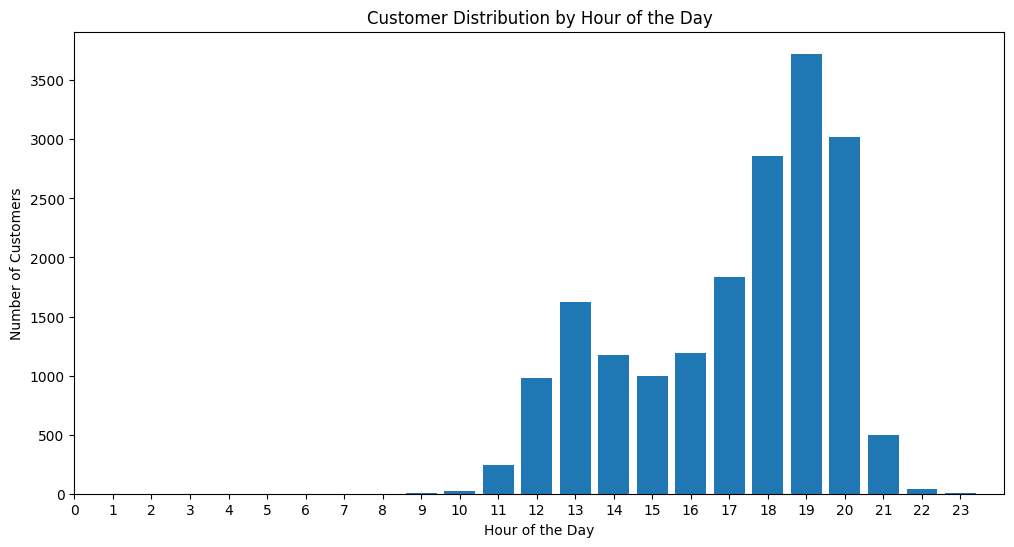

In [ ]:
# แยกเฉพาะชั่วโมงจากคอลัมน์ 'เวลา'
df3['Hour'] = pd.to_datetime(df3['Time']).dt.hour

# นับจำนวนลูกค้าในแต่ละชั่วโมง
hourly_customer_counts = df3['Hour'].value_counts().sort_index()

# สร้างแผนภูมิแท่งเพื่อแสดงการกระจายตัวของลูกค้ารายชั่วโมง
plt.figure(figsize=(12, 6))
plt.bar(hourly_customer_counts.index, hourly_customer_counts.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Hour of the Day')
plt.xticks(range(24))  # แสดงชั่วโมงตั้งแต่ 0 ถึง 23 บนแกน x
plt.show()


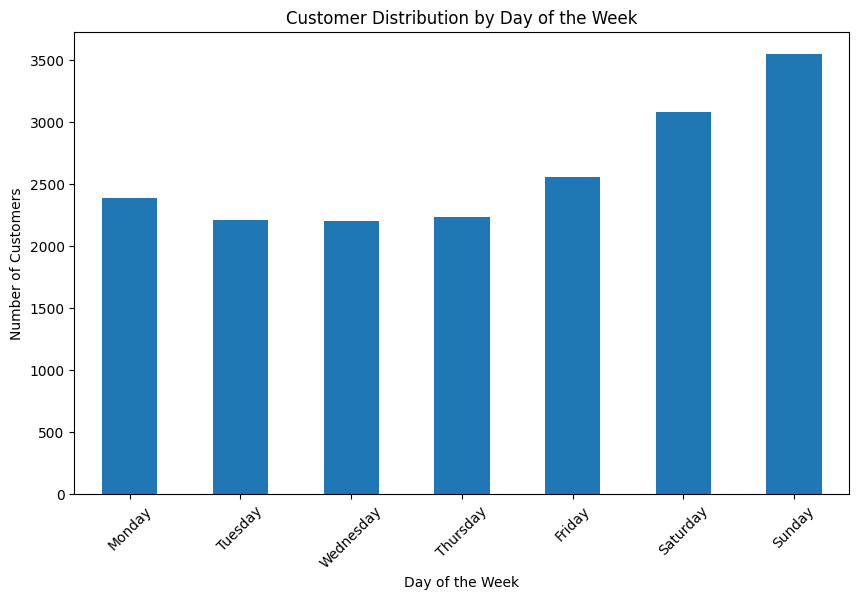

In [ ]:
# นับจำนวนลูกค้าในแต่ละวันของสัปดาห์
day_customer_counts = df3['Day'].value_counts()

# กำหนดลำดับวันในสัปดาห์
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# สร้างแผนภูมิแท่งเพื่อแสดงการกระจายตัวของลูกค้าตามวันในสัปดาห์
plt.figure(figsize=(10, 6))
day_customer_counts[days_order].plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Day of the Week')
plt.xticks(rotation=45)
plt.show()


<ipython-input-76-3557fcd22279>:33: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df3['Date'] = pd.to_datetime(df3['Date'])


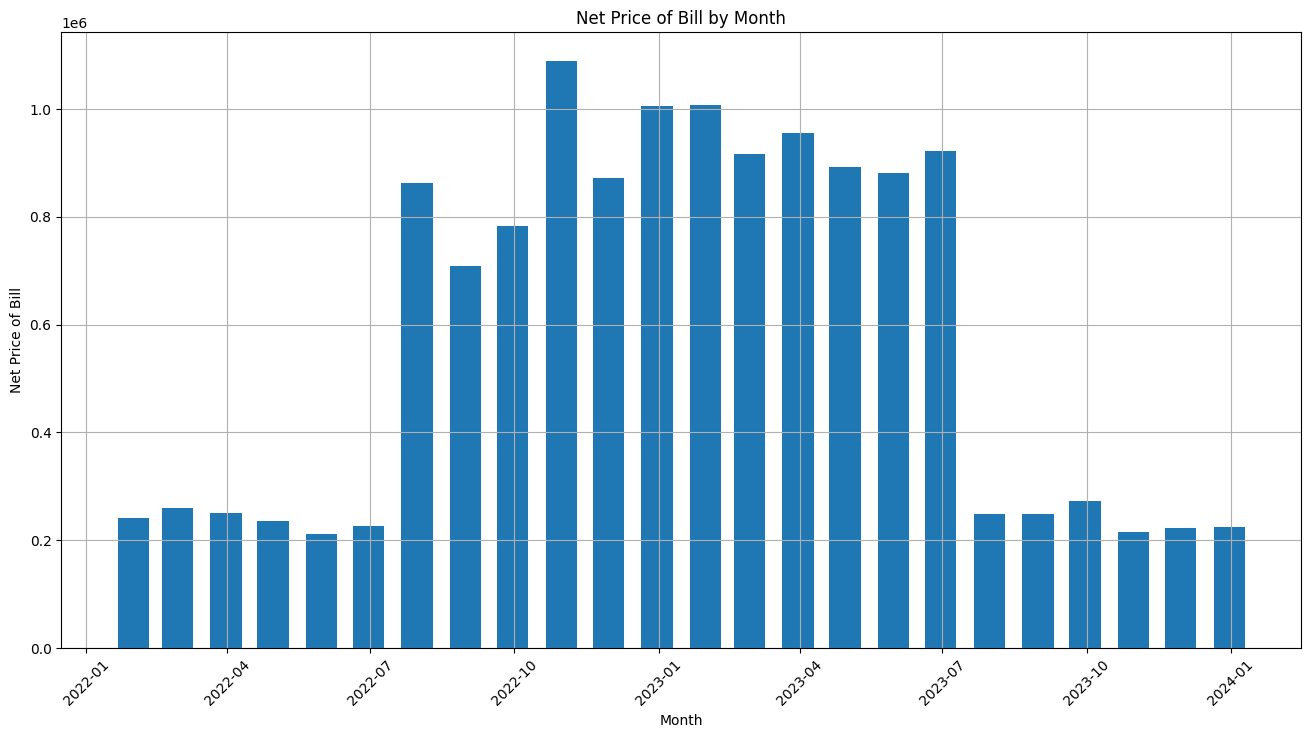

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
file_path = '/content/304 (กบินทร์บุรี).csv'
df3 = pd.read_csv(file_path)

# แปลงชื่อคอลัมน์เป็นภาษาอังกฤษ
df3 = df3.rename(columns={
    'ลำดับ': 'Order',
    'วันที่': 'Date',
    'วัน': 'Day',
    'เวลา': 'Time',
    'เลขที่บิล': 'Bill Number',
    'ประเภทบิล': 'Bill Type',
    'เลขที่ใบเสร็จ/เลขที่ใบแจ้งหนี้': 'Invoice Number',
    'ประเภทการชำระเงิน': 'Payment Type',
    'ราคารวมก่อนส่วนลด': 'Total Price Before Discount',
    'ส่วนลดจากรายการที่ให้ฟรี': 'Discount from Free Items',
    'ราคาสุทธิ (ใบเสร็จ/ใบแจ้งหนี้)': 'Net Price (Invoice)',
    'ราคาสุทธิของบิล': 'Net Price of Bill',
    'สถานะ': 'Status',
    'ประจำวัน': 'Daily',
    'ประจำเดือน': 'Monthly',
    'ประจำวันหยุด': 'Holiday',
    'ยอดประจำชนิดวัน': 'Daily Type Total',
    ' วันหวยออก ': 'Lottery Draw Day',
    'ช่วงเปิดเทอม': 'Semester Opening',
    'ช่วงปิดเทอม': 'Semester Closing'
})

# แปลงคอลัมน์ "วันที่" เป็นรูปแบบวันที่
df3['Date'] = pd.to_datetime(df3['Date'])

# กลุ่มข้อมูลตามเดือนและคำนวณยอดขายรวมในแต่ละเดือน
monthly_data = df3.groupby(pd.Grouper(key='Date', freq='M'))['Net Price of Bill'].sum()

# สร้างกราฟแผนภูมิแท่งสำหรับแต่ละเดือน
plt.figure(figsize=(16, 8))  # ปรับขนาดกราฟ
plt.bar(monthly_data.index, monthly_data.values, width=20)  # ปรับขนาดของแท่งด้วย width
plt.title('Net Price of Bill by Month')
plt.xlabel('Month')
plt.ylabel('Net Price of Bill')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# ทำการ Prediction ยอดขายรายวันด้วย LSTM สาขา 304 กบินทร์บุรี

<ipython-input-205-32011b3f6289>:37: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df3['Date'] = pd.to_datetime(df3['Date'])


Epoch 1/20
214/214 [==============================] - 6s 12ms/step - loss: 0.0124
Epoch 2/20
214/214 [==============================] - 2s 8ms/step - loss: 0.0103
Epoch 3/20
214/214 [==============================] - 2s 8ms/step - loss: 0.0103
Epoch 4/20
214/214 [==============================] - 2s 7ms/step - loss: 0.0103
Epoch 5/20
214/214 [==============================] - 2s 10ms/step - loss: 0.0103
Epoch 6/20
214/214 [==============================] - 2s 9ms/step - loss: 0.0103
Epoch 7/20
214/214 [==============================] - 2s 8ms/step - loss: 0.0103
Epoch 8/20
214/214 [==============================] - 2s 7ms/step - loss: 0.0103
Epoch 9/20
214/214 [==============================] - 2s 7ms/step - loss: 0.0103
Epoch 10/20
214/214 [==============================] - 2s 8ms/step - loss: 0.0103
Epoch 11/20
214/214 [==============================] - 2s 7ms/step - loss: 0.0103
Epoch 12/20
214/214 [==============================] - 2s 9ms/step - loss: 0.0103
Epoch 13/20
214/214 [==

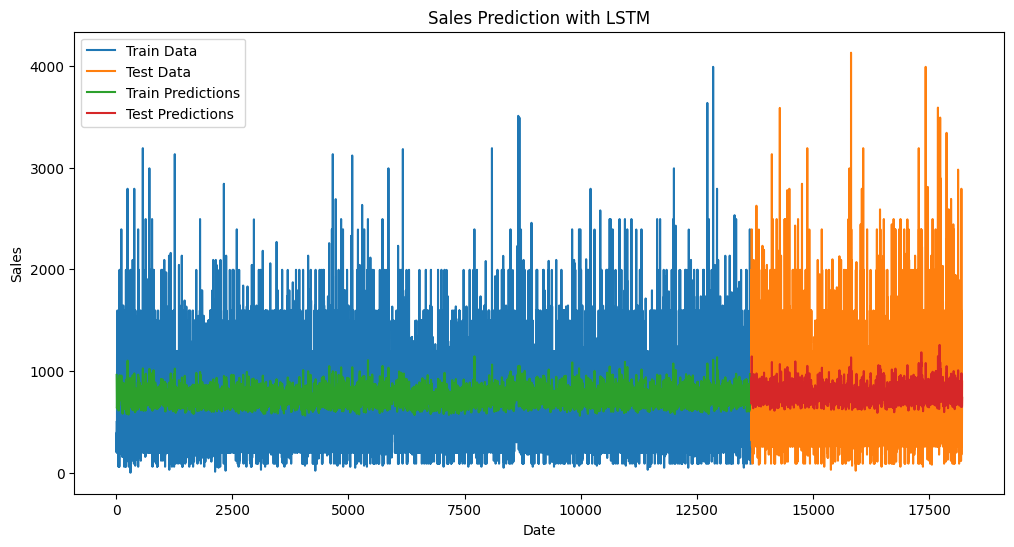

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
# อ่านไฟล์ CSV
file_path = '/content/304 (กบินทร์บุรี).csv'
df3 = pd.read_csv(file_path)

# แปลงชื่อคอลัมน์เป็นภาษาอังกฤษ
df3 = df3.rename(columns={
    'ลำดับ': 'Order',
    'วันที่': 'Date',
    'วัน': 'Day',
    'เวลา': 'Time',
    'เลขที่บิล': 'Bill Number',
    'ประเภทบิล': 'Bill Type',
    'เลขที่ใบเสร็จ/เลขที่ใบแจ้งหนี้': 'Invoice Number',
    'ประเภทการชำระเงิน': 'Payment Type',
    'ราคารวมก่อนส่วนลด': 'Total Price Before Discount',
    'ส่วนลดจากรายการที่ให้ฟรี': 'Discount from Free Items',
    'ราคาสุทธิ (ใบเสร็จ/ใบแจ้งหนี้)': 'Net Price (Invoice)',
    'ราคาสุทธิของบิล': 'Net Price of Bill',
    'สถานะ': 'Status',
    'ประจำวัน': 'Daily',
    'ประจำเดือน': 'Monthly',
    'ประจำวันหยุด': 'Holiday',
    'ยอดประจำชนิดวัน': 'Daily Type Total',
    'วันหวยออก': 'Lottery Draw Day',
    'ช่วงเปิดเทอม': 'Semester Opening',
    'ช่วงปิดเทอม': 'Semester Closing'
})

# แปลงคอลัมน์ "วันที่" เป็นรูปแบบวันที่
df3['Date'] = pd.to_datetime(df3['Date'])

# กลุ่มข้อมูลตามเดือนและคำนวณยอดขายรวมในแต่ละเดือน
monthly_data = df3.groupby(pd.Grouper(key='Date', freq='M'))['Net Price of Bill'].sum()

# แก้ไขข้อมูลที่หายด้วยค่าเฉลี่ยของข้อมูลเดิมเข้าไป
average_net_price = df3['Net Price of Bill'].mean()
df3['Net Price of Bill'].fillna(average_net_price, inplace=True)

average_Date = df3['Date'].mean()
df3['Date'].fillna(average_Date, inplace=True)


# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df3['Net Price of Bill'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.75)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Create sequences of data for LSTM training
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

seq_length = 10
X_train = create_sequences(train_data, seq_length)
y_train = train_data[seq_length:]
X_test = create_sequences(test_data, seq_length)
y_test = test_data[seq_length:]

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=64)

# Make predictions using the trained model
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predictions to the original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(df3.index[seq_length:train_size], df3['Net Price of Bill'][seq_length:train_size], label='Train Data')
plt.plot(df3.index[train_size+seq_length:], df3['Net Price of Bill'][train_size+seq_length:], label='Test Data')
plt.plot(df3.index[seq_length:train_size], train_predictions, label='Train Predictions')
plt.plot(df3.index[train_size+seq_length:], test_predictions, label='Test Predictions')
plt.legend()
plt.title('Sales Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [ ]:
print(df3['Date'].isna().sum())

0


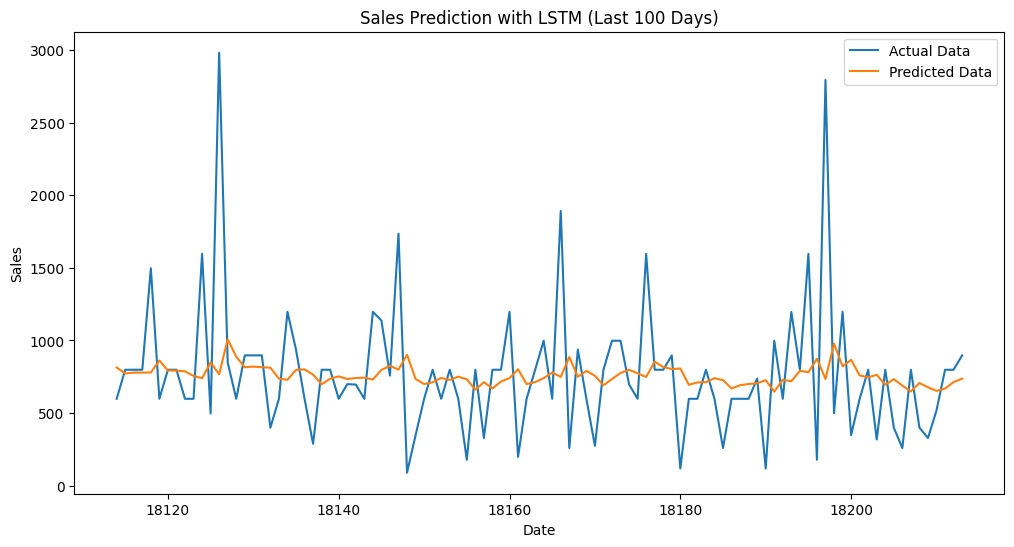

Test MAPE (Last 100 Days): 67.98%
Predicted Value for the Next Day: 736.50


In [ ]:
# Calculate MAPE for the last 100 days
last_100_days_data = df3[-100:]
test_predictions_last_100_days = test_predictions[-100:]

# Convert the data to Series
actual_data_series = last_100_days_data['Net Price of Bill'].reset_index(drop=True)
predicted_data_series = pd.Series(test_predictions_last_100_days.flatten())

test_mape_last_100_days = calculate_mape(actual_data_series, predicted_data_series)
# Get the last predicted value (value for the next day)
next_day_predicted_value3 = predicted_data_series.iloc[-1]

# Plot the actual and predicted values for the last 100 days
plt.figure(figsize=(12, 6))
plt.plot(last_100_days_data.index, last_100_days_data['Net Price of Bill'], label='Actual Data')
plt.plot(last_100_days_data.index, test_predictions_last_100_days, label='Predicted Data')
plt.legend()
plt.title('Sales Prediction with LSTM (Last 100 Days)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

print(f'Test MAPE (Last 100 Days): {test_mape_last_100_days:.2f}%')
# Print the last predicted value
print(f'Predicted Value for the Next Day: {next_day_predicted_value3:.2f}')


# สรุป
ผลลัพธ์จากงานนี้คือการสร้างและใช้โมเดล LSTM เพื่อทำนาย Net Price of Bill และการแสดงผลลัพธ์ในรูปแบบกราฟเพื่อตรวจสอบความคลาดเคลื่อนของการทำนายโดยใช้ MAPE และการแสดงกราฟ Predicted vs. Actual Value

# ทำการ Prediction ยอดขายในเดือนถัดไปของสาขา 304 กบินทร์บุรี

ARIMA (AutoRegressive Integrated Moving Average) เป็นโมเดลที่เหมาะสำหรับงานที่มีลักษณะข้อมูลเป็นชุดข้อมูลเวลา (time series data) และมีความเชื่อมโยงระหว่างข้อมูลในอดีตและในอนาคต โดยเฉพาะในกรณีที่ข้อมูลมีความเปลี่ยนแปลงตามแนวเวลาและมีความเป็นเทรนด์ (trend) และความคลาดเคลื่อน (seasonality) อย่างชัดเจน

ARIMA เหมาะสำหรับงานที่มีลักษณะเช่น:

การทำนายยอดขาย: ARIMA สามารถใช้ในการทำนายยอดขายสินค้าหรือบริการในอนาคต โดยใช้ข้อมูลยอดขายในอดีตเพื่อทำนายการขายในอนาคต.

การทำนายการเงิน: ARIMA ใช้กันอย่างแพร่หลายในการทำนายอัตราแลกเปลี่ยน (exchange rates), ราคาหุ้น (stock prices), และอื่น ๆ ที่เกี่ยวข้องกับการเงินและการลงทุน.

การทำนายการจัดซื้อสินค้า: สำหรับธุรกิจหรือองค์กรที่ต้องการวางแผนการจัดซื้อสินค้าหรือวัสดุในอนาคต ARIMA สามารถช่วยในการทำนายปริมาณการจัดซื้อ.

การทำนายการบริโภค: ARIMA สามารถใช้ในการทำนายการบริโภคของผู้บริโภค เช่น การทำนายยอดการซื้อสินค้าในห้างสรรพสินค้า.

การทำนายการจราจร: สำหรับหน่วยงานการจราจรหรือบริษัทด้านการขนส่ง ARIMA สามารถใช้ในการทำนายปริมาณการจราจรในอนาคต.

อย่างไรก็ดี ARIMA ไม่ใช่โมเดลที่เหมาะกับทุกประเภทของข้อมูลเวลา มันอาจไม่เหมาะสมในกรณีที่ข้อมูลมีความซับซ้อนมากหรือมีความสั้น ๆ หรือไม่มีโครงสร้างเวลาที่ชัดเจน ในกรณีเช่นนี้ โมเดลอื่น เช่น Prophet ของ Facebook หรือ LSTM (Long Short-Term Memory) ใน deep learning อาจจะเหมาะกว่าสำหรับการทำนายข้อมูลเวลาที่ซับซ้อนมากขึ้น.

สรุปได้ว่า ARIMA เหมาะสำหรับงานที่มีข้อมูลเวลาที่มีโครงสร้างและการเปลี่ยนแปลงตามแนวเวลา แต่ควรพิจารณาการใช้โมเดลอื่นๆ ในกรณีที่ข้อมูลมีลักษณะที่ซับซ้อนหรือไม่เหมาะกับ ARIMA แบบมาตรฐาน.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


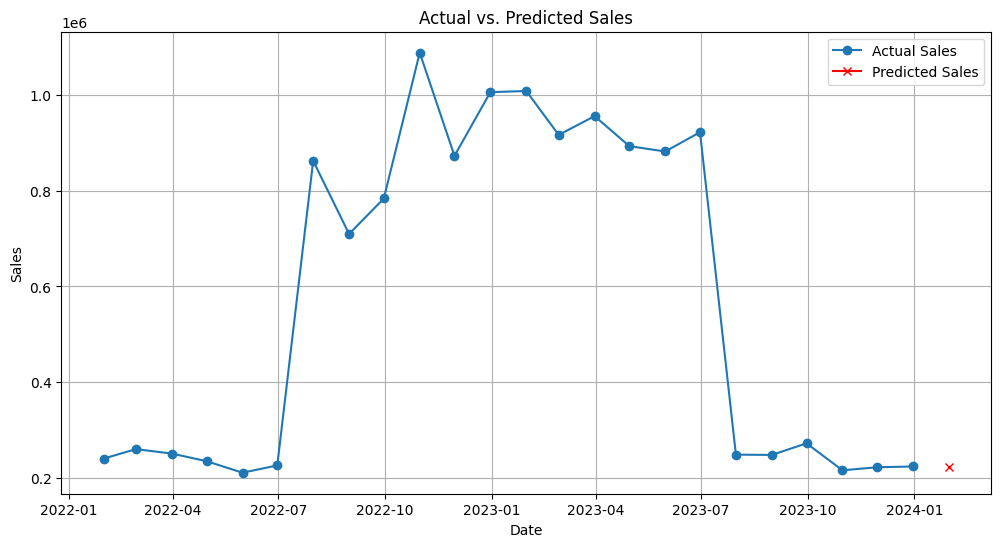

ยอดขายที่ทำนายในเดือนต่อไป: 223845.71406906252


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
# กลุ่มข้อมูลตามเดือนและคำนวณยอดขายรวมในแต่ละเดือน

monthly_data = df3.groupby(pd.Grouper(key='Date', freq='M'))['Net Price of Bill'].sum()

# กำหนดค่า p, d, และ q ให้เหมาะสม (ต้องปรับแต่งตามข้อมูล)
p, d, q = 1, 1, 1

# สร้างแบบจำลอง ARIMA
model = ARIMA(monthly_data, order=(p, d, q))

# ฝึกโมเดล ARIMA
model_fit = model.fit()

# ทำนายยอดขายในเดือนต่อไป
next_month_forecast = model_fit.forecast(steps=1)

# สร้างกราฟเพื่อแสดงการทำนายและข้อมูลจริง
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data.values, label='Actual Sales', marker='o')
plt.plot(next_month_date, next_month_forecast, label='Predicted Sales', marker='x', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()

print("ยอดขายที่ทำนายในเดือนต่อไป:",  next_month_forecast[0])


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# คำนวณ MAE และ RMSE
actual_values = monthly_data.iloc[-1]  # ยอดขายจริงของเดือนล่าสุด
mae = mean_absolute_error([actual_values], [next_month_forecast[0]])
rmse = np.sqrt(mean_squared_error([actual_values], [next_month_forecast[0]]))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)


Mean Absolute Error (MAE): 322.2859309374762
Root Mean Square Error (RMSE): 322.2859309374762


โค้ดนี้จะคำนวณค่า MAE และ RMSE ของการทำนายของเดือนถัดไปเมื่อเทียบกับยอดขายจริงของเดือนล่าสุด ค่า MAE และ RMSE ที่ต่ำมากจะแสดงว่าโมเดลที่สร้างมีประสิทธิภาพที่ดีในการทำนาย.

จากสิ่งที่ได้แปลว่าการทำนายมีความคลาดเคลื่อนเฉลี่ยอยู่ในช่วงราว 322 หน่วย (หรือหน่วยของค่าของแกน Y ซึ่งในกรณีนี้คือยอดขาย) ซึ่งคือความคลาดเคลื่อนที่ค่อนข้างต่ำ.

การวิเคราะห์และประเมินโมเดล ARIMA มีหลายขั้นตอนและข้อดีข้อเสียต่าง ๆ ซึ่งอาจต้องใช้ความเข้าใจในสถิติและการประมวลผลข้อมูลเพิ่มเติมด้วย